<a href="https://colab.research.google.com/github/vishwaskv01/deeplearning/blob/main/DL_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with Gradient Descent:
Epoch 1/50, Loss: 23.0727
Epoch 2/50, Loss: 21.9658
Epoch 3/50, Loss: 21.6571
Epoch 4/50, Loss: 21.5690
Epoch 5/50, Loss: 21.5427
Epoch 6/50, Loss: 21.5339
Epoch 7/50, Loss: 21.5301
Epoch 8/50, Loss: 21.5276
Epoch 9/50, Loss: 21.5255
Epoch 10/50, Loss: 21.5235
Epoch 11/50, Loss: 21.5215
Epoch 12/50, Loss: 21.5196
Epoch 13/50, Loss: 21.5176
Epoch 14/50, Loss: 21.5157
Epoch 15/50, Loss: 21.5138
Epoch 16/50, Loss: 21.5118
Epoch 17/50, Loss: 21.5099
Epoch 18/50, Loss: 21.5079
Epoch 19/50, Loss: 21.5060
Epoch 20/50, Loss: 21.5040
Epoch 21/50, Loss: 21.5021
Epoch 22/50, Loss: 21.5001
Epoch 23/50, Loss: 21.4982
Epoch 24/50, Loss: 21.4962
Epoch 25/50, Loss: 21.4943
Epoch 26/50, Loss: 21.4923
Epoch 27/50, Loss: 21.4904
Epoch 28/50, Loss: 21.4884
Epoch 29/50, Loss: 21.4864
Epoch 30/50, Loss: 21.4845
Epoch 31/50, Loss: 21.4825
Epoch 32/50, Loss: 21.4805
Epoch 33/50, Loss: 21.4785
Epoch 34/50, Loss: 21.4765
Epoch 35/50, Loss: 21.4745
Epoch 36/50, Loss: 21.4725
Epoc

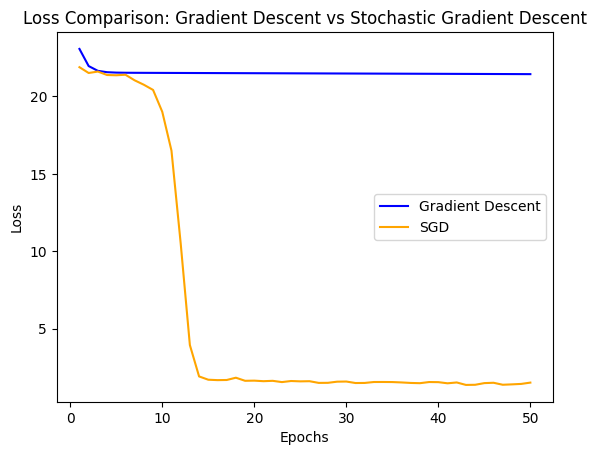

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt


def create_data():
    X = np.random.randn(1000, 10)
    y = 2 * X[:, 0] + 4* X[:, 1] + np.random.randn(1000)
    return X, y


def create_model():
    model = models.Sequential([
        layers.Dense(32, activation="sigmoid", input_shape=(10,)),
        layers.Dense(128, activation="sigmoid"),
        layers.Dense(64, activation="sigmoid"),
        layers.Dense(1)
    ])
    return model


def train_model_with_history(model, optimizer, X, y, batch_size, epochs):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = []
    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
    return history

X, y = create_data()


model_gd = create_model()
model_sgd = create_model()


optimizer_gd = optimizers.SGD(learning_rate=0.01)
optimizer_sgd = optimizers.SGD(learning_rate=0.01)

epochs = 50
batch_size = 32


print("\nTraining with Gradient Descent:")
loss_gd = train_model_with_history(model_gd, optimizer_gd, X, y, batch_size=len(X), epochs=epochs)

print("\nTraining with Stochastic Gradient Descent:")
loss_sgd = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size=batch_size, epochs=epochs)


plt.plot(range(1, epochs + 1), loss_gd, label='Gradient Descent', color='blue')
plt.plot(range(1, epochs + 1), loss_sgd, label='SGD', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison: Gradient Descent vs Stochastic Gradient Descent')
plt.legend()
plt.show()


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 74ms/step - accuracy: 0.2886 - loss: 2.0952 - val_accuracy: 0.6285 - val_loss: 1.3402
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 72ms/step - accuracy: 0.5857 - loss: 1.3330 - val_accuracy: 0.6546 - val_loss: 0.9489
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.6177 - loss: 1.0217 - val_accuracy: 0.6359 - val_loss: 0.8221
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.6340 - loss: 0.8914 - val_accuracy: 0.6973 - val_loss: 0.7413
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.6798 - loss: 0.8148 - val_accuracy: 0.7601 - val_loss: 0.6861
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7506 - loss: 0.7024 
Test accuracy: 0.7601


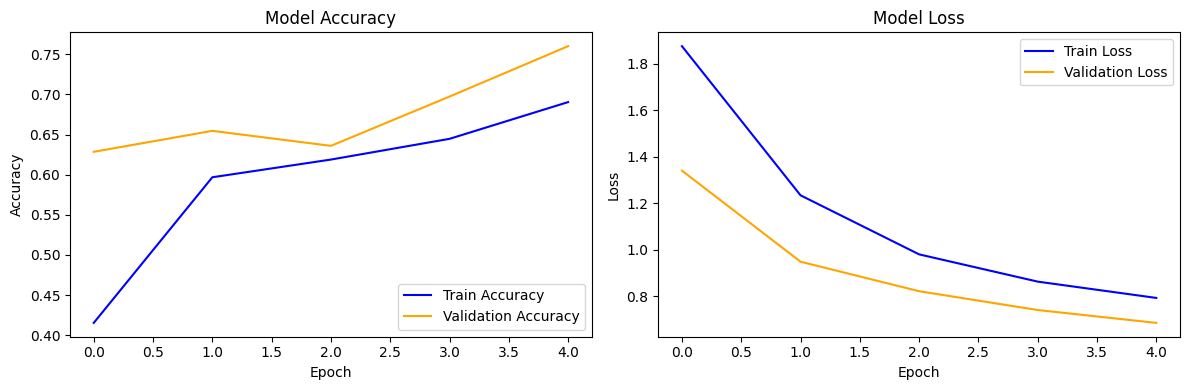

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
])


model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='softmax'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels),
                    callbacks=[early_stopping], batch_size=64)


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
